In [ ]:
# Load and Explore The Data

In [46]:
import pandas as pd
import numpy as np

iris_df = pd.read_csv('IRIS.csv')

print("Dataset shape:", iris_df.shape)

Dataset shape: (150, 5)


In [45]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
print("Missing values:")
iris_df.isnull().sum()

Missing values:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [48]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# Distribution of species
print("\nSpecies distribution:")
species_counts = iris_df['species'].value_counts()
print(species_counts)


Species distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [50]:
# Visualization

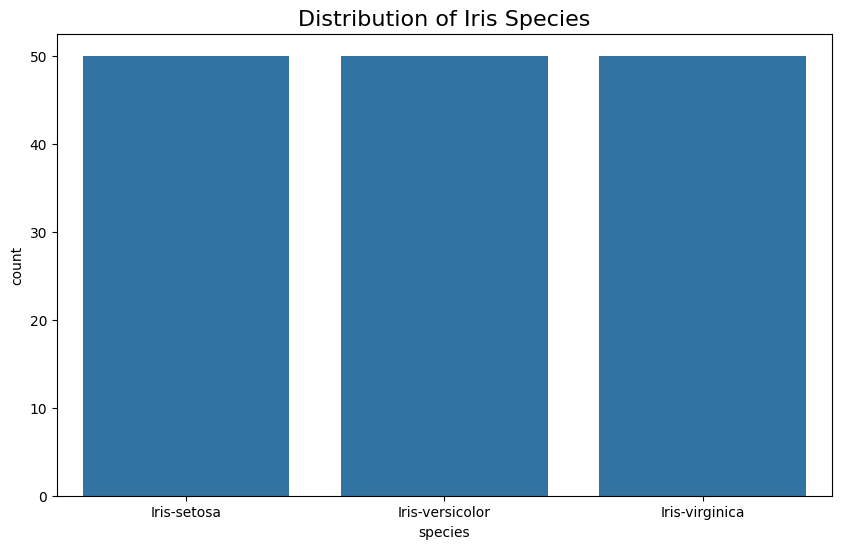

In [51]:
# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=iris_df)
plt.title('Distribution of Iris Species', fontsize=16)
plt.show()

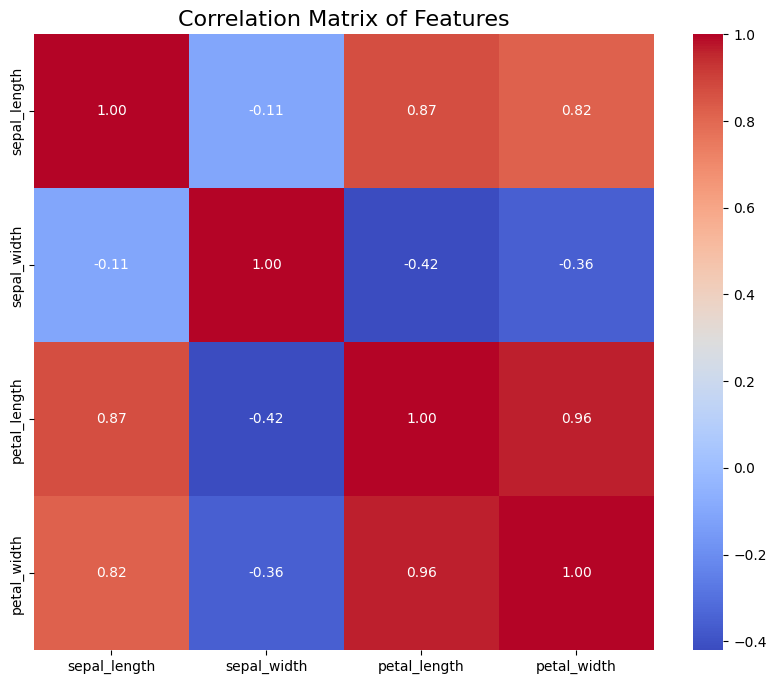

In [52]:
# Correlation Matrix heatmap
plt.figure(figsize=(10, 8))
numeric_data = iris_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

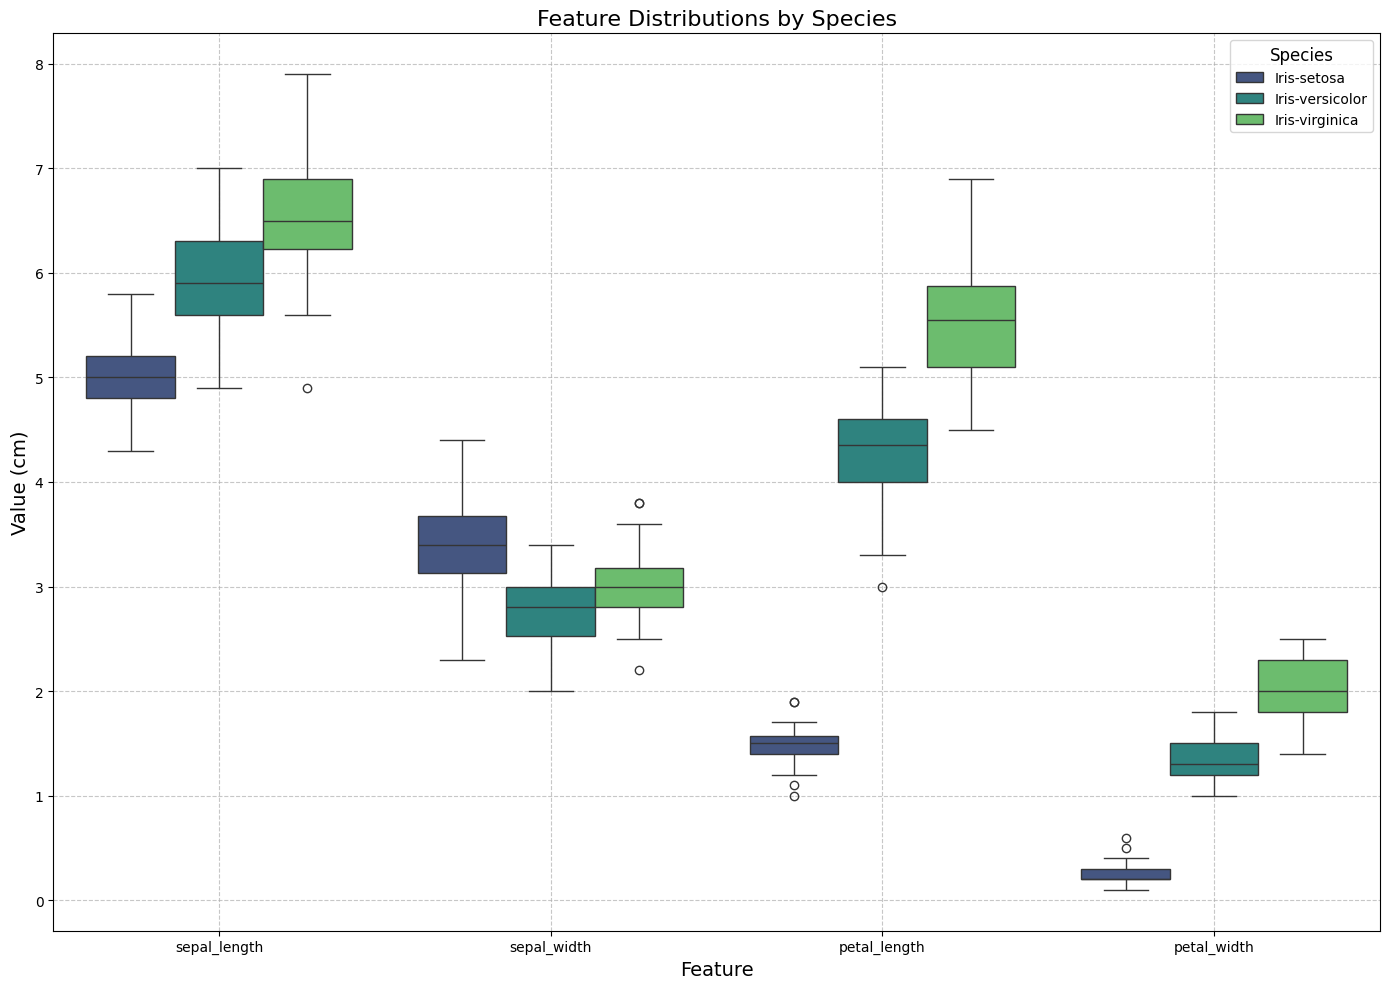

In [53]:
# Feature distributions across species
plt.figure(figsize=(14, 10))

iris_melt = pd.melt(iris_df, id_vars=['species'],
                   value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                   var_name='feature', value_name='value')

sns.boxplot(x='feature', y='value', hue='species', data=iris_melt, palette='viridis')

plt.title('Feature Distributions by Species', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Value (cm)', fontsize=14)
plt.legend(title='Species', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
# Data Preprocessing

In [55]:
from sklearn.model_selection import train_test_split

X = iris_df.drop('species', axis=1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (120, 4), (120,)
Testing set shape: (30, 4), (30,)


In [56]:
# One-Hot Encoding for Target Variable

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding to the encoded labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

print("Original labels:", label_encoder.classes_)
print("\nEncoded labels (first 5 samples):")
for i in range(5):
    print(f"Original: {y_train.iloc[i]}, Encoded: {y_train_encoded[i]}, One-Hot: {y_train_onehot[i]}")

Original labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Encoded labels (first 5 samples):
Original: Iris-setosa, Encoded: 0, One-Hot: [1. 0. 0.]
Original: Iris-virginica, Encoded: 2, One-Hot: [0. 0. 1.]
Original: Iris-versicolor, Encoded: 1, One-Hot: [0. 1. 0.]
Original: Iris-setosa, Encoded: 0, One-Hot: [1. 0. 0.]
Original: Iris-versicolor, Encoded: 1, One-Hot: [0. 1. 0.]


In [58]:
onehot_df = pd.DataFrame(
    y_train_onehot,
    columns=[f"{cls}" for cls in label_encoder.classes_]
)
print("\nOne-hot encoded target (first 10 samples):")
print(onehot_df.head(10))


One-hot encoded target (first 10 samples):
   Iris-setosa  Iris-versicolor  Iris-virginica
0          1.0              0.0             0.0
1          0.0              0.0             1.0
2          0.0              1.0             0.0
3          1.0              0.0             0.0
4          0.0              1.0             0.0
5          0.0              0.0             1.0
6          0.0              1.0             0.0
7          0.0              0.0             1.0
8          0.0              0.0             1.0
9          0.0              0.0             1.0


In [59]:
# Creating Polynomial Features

In [60]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original feature shape: {X_train.shape}")
print(f"Polynomial feature shape: {X_train_poly.shape}")

feature_names = poly.get_feature_names_out(X.columns)

poly_df = pd.DataFrame(
    X_train_poly[:5],
    columns=feature_names
)
print("\nSample of polynomial features (first 5 samples, first 10 features):")
print(poly_df.iloc[:, :10])

print("\nAll polynomial feature names:")
print(feature_names)

Original feature shape: (120, 4)
Polynomial feature shape: (120, 14)

Sample of polynomial features (first 5 samples, first 10 features):
   sepal_length  sepal_width  petal_length  petal_width  sepal_length^2  \
0           4.4          2.9           1.4          0.2           19.36   
1           4.9          2.5           4.5          1.7           24.01   
2           6.8          2.8           4.8          1.4           46.24   
3           4.9          3.1           1.5          0.1           24.01   
4           5.5          2.5           4.0          1.3           30.25   

   sepal_length sepal_width  sepal_length petal_length  \
0                     12.76                       6.16   
1                     12.25                      22.05   
2                     19.04                      32.64   
3                     15.19                       7.35   
4                     13.75                      22.00   

   sepal_length petal_width  sepal_width^2  sepal_width petal_

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

print("Before scaling:")
print(f"Mean: {X_train_poly.mean(axis=0)[:5]}")
print(f"Std: {X_train_poly.std(axis=0)[:5]}")

print("\nAfter scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std: {X_train_scaled.std(axis=0)[:5]}")


Before scaling:
Mean: [ 5.84166667  3.04416667  3.77083333  1.20416667 34.82633333]
Std: [ 0.837415    0.44380849  1.76003768  0.76063524 10.11511739]

After scaling:
Mean: [-1.20829273e-15 -2.53315887e-15  1.48029737e-16  1.55246186e-15
  3.40468394e-16]
Std: [1. 1. 1. 1. 1.]


In [62]:
scaled_df = pd.DataFrame(
    X_train_scaled[:5],
    columns=feature_names
)
print("\nScaled features (first 5 samples, first 10 features):")
print(scaled_df.iloc[:, :10])


Scaled features (first 5 samples, first 10 features):
   sepal_length  sepal_width  petal_length  petal_width  sepal_length^2  \
0     -1.721568    -0.324840     -1.347036    -1.320168       -1.529032   
1     -1.124492    -1.226129      0.414290     0.651867       -1.069324   
2      1.144395    -0.550162      0.584741     0.257460        1.128377   
3     -1.124492     0.125805     -1.290219    -1.451638       -1.069324   
4     -0.408002    -1.226129      0.130206     0.125991       -0.452425   

   sepal_length sepal_width  sepal_length petal_length  \
0                 -1.440871                  -1.296860   
1                 -1.588284                  -0.096370   
2                  0.374339                   0.703704   
3                 -0.738489                  -1.206955   
4                 -1.154715                  -0.100148   

   sepal_length petal_width  sepal_width^2  sepal_width petal_length  
0                 -1.262032      -0.377900                 -1.347229  
1  

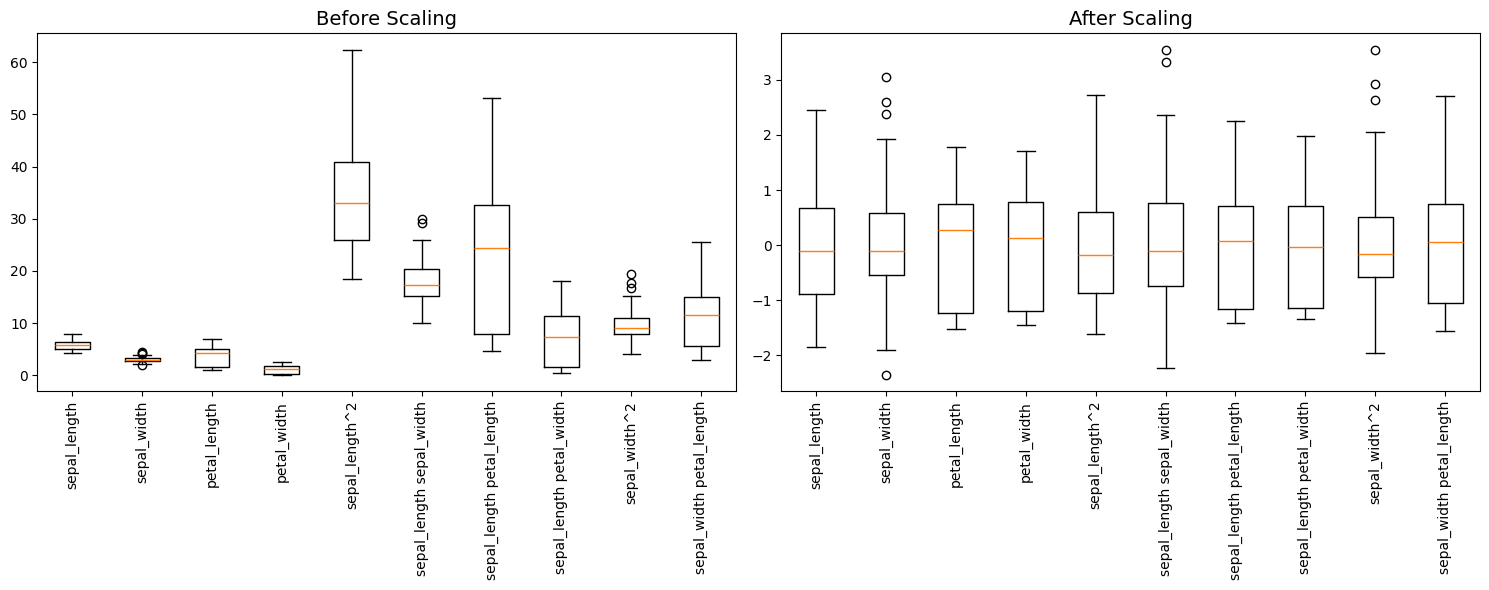

In [63]:
# Visualize the effect of scaling with a boxplot for the first 10 features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.boxplot(X_train_poly[:, :10])
plt.title('Before Scaling', fontsize=14)
plt.xticks(range(1, 11), feature_names[:10], rotation=90)

plt.subplot(1, 2, 2)
plt.boxplot(X_train_scaled[:, :10])
plt.title('After Scaling', fontsize=14)
plt.xticks(range(1, 11), feature_names[:10], rotation=90)

plt.tight_layout()
plt.show()

In [64]:
# Model Training with Preprocessed Features

Logistic Regression Accuracy: 0.9667
Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



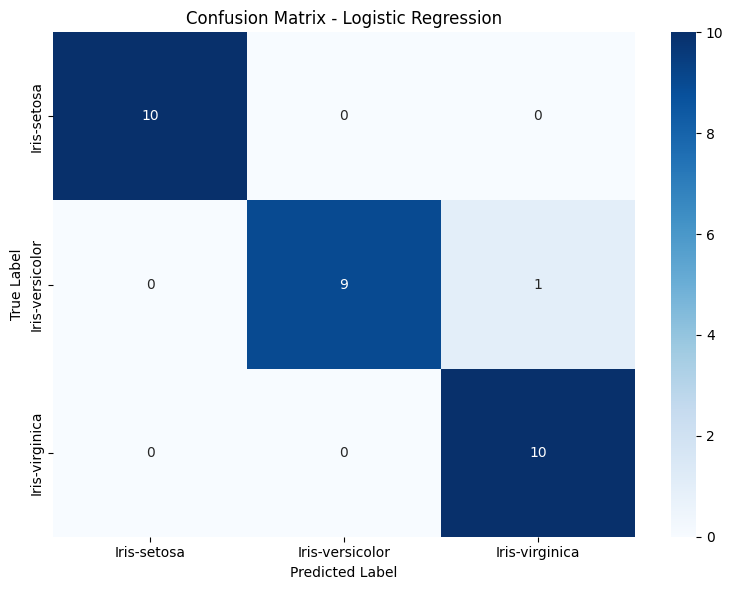


--------------------------------------------------

Random Forest Accuracy: 0.9667
Classification Report for Random Forest:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



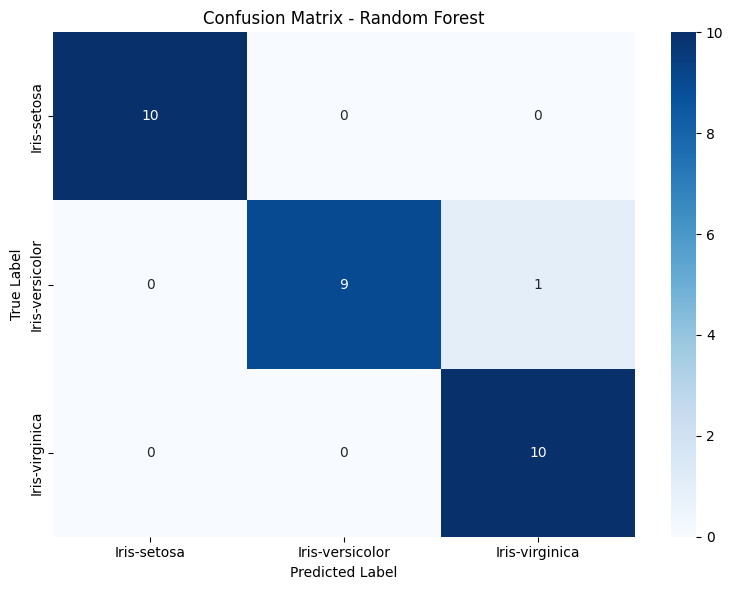


--------------------------------------------------



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }

    print(f"{name} Accuracy: {accuracy:.4f}")

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    print("\n" + "-"*50 + "\n")

In [39]:
# Comparing Model Performance

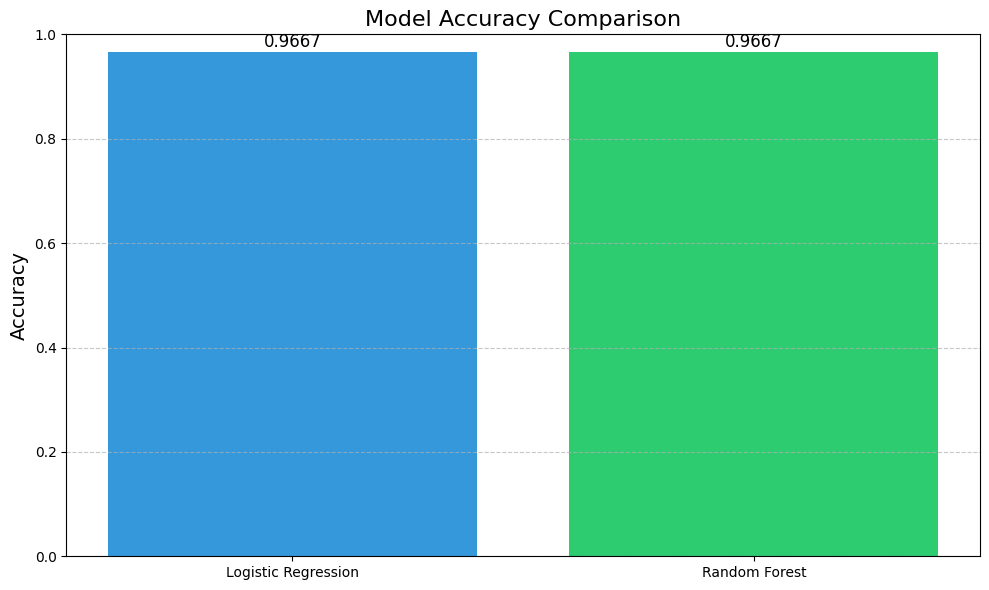

In [65]:
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#3498db', '#2ecc71'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f'{acc:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()